No 1


In [ ]:
# imporrt libraries
# Import standard packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modeling tools
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

In [ ]:
# set the default output to pandas
from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Connect to drive and load data
# Load the modified galton height data
fpath = "//content/loan_data [Task 1-3] - loan_data.csv"
df = pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Expolration

In [ ]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
df['Dependents'] = df['Dependents'].replace({'3+': '3', float('nan'):"0"})

In [ ]:
#Changing the datatype for dependents to int
df['Dependents'] = df['Dependents'].astype(int)

In [ ]:
# Checking nuniuqe categories
df.select_dtypes('object').nunique()

,0
Loan_ID,614
Gender,2
Married,2
Education,2
Self_Employed,2
Property_Area,3
Loan_Status,2


In [ ]:
df = df.set_index('Loan_ID')


In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [ ]:
# checking for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe().round(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.00,614.00,614.00,592.00,600.00,564.00
mean,0.74,5403.46,1621.25,146.41,342.00,0.84
std,1.01,6109.04,2926.25,85.59,65.12,0.36
min,0.00,150.00,0.00,9.00,12.00,0.00
25%,0.00,2877.50,0.00,100.00,360.00,1.00
50%,0.00,3812.50,1188.50,128.00,360.00,1.00
75%,1.00,5795.00,2297.25,168.00,360.00,1.00
max,3.00,81000.00,41667.00,700.00,480.00,1.00


Data Preprocessing

In [ ]:
# Separate features vs target & train/test split - aaranging the data into feature matrix (x) and target vector (y)
X = df.drop(columns = 'Loan_Status')
y = df['Loan_Status']

In [ ]:
#splitting the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(len(X_train), len(X_test))
len(y_train), len(y_test)

460 154


(460, 154)

In [ ]:
# Select numeric columns
numeric_cols = X_train.select_dtypes(include=['number']).columns

# Creating a pipeline
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
#select categorical columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# Creating a pipeline
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False , handle_unknown='ignore'))
])

In [ ]:
#Instantiate the preprocessor/ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    verbose_feature_names_out=False
)
#verbose_feature_names_out=False remove names for the column names ie (num_depent


In [ ]:
# Transform the training and test data
X_train_tf= preprocessor.fit_transform(X_train)
X_test_tf= preprocessor.transform(X_test)



In [ ]:
X_train_tf.isna().sum()
X_test_tf.isna().sum()

,0
Dependents,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0
Gender_Female,0
Gender_Male,0
Married_No,0
Married_Yes,0


In [ ]:
X_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001319,Male,Yes,2,Not Graduate,No,3273,1820.0,81.0,360.0,1.0,Urban
LP001978,Male,No,0,Graduate,No,4000,2500.0,140.0,360.0,1.0,Rural


In [ ]:
X_train_tf.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,,,,
LP001319,1.263671,-0.367033,0.086684,-0.787214,0.308891,0.447225,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
LP001978,-0.720249,-0.246214,0.344716,-0.085814,0.308891,0.447225,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix , ConfusionMatrixDisplay , f1_score, precision_score, recall_score
from sklearn import tree

In [ ]:
# Instantiate a default\intial decision tree
default_tree = DecisionTreeClassifier(random_state=42)
## Model training and Fit on the training data
default_tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#Testing the model
default_tree_pred = default_tree.predict(X_test_tf)

default_tree_pred

array(['Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y'],
      dtype=object)

In [ ]:
y_test

,Loan_Status
Loan_ID,
LP002139,Y
LP002223,Y
LP001570,Y
LP002978,Y
LP001478,Y
...,...
LP002732,Y
LP002502,Y
LP002894,Y


Tuned decision tree with GridSearchCV

In [ ]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, 10],  # Example: Try different depths for the tree
    'min_samples_split': [2, 5, 10],  # Example: Try different minimum samples to split a node
    'criterion': ['gini', 'entropy']  # Example: Try different split criteria
}

# Instantiate GridSearchCV with the estimator (DecisionTreeClassifier) and param_grid, use scoring recall macro for evalution
gsc_tree = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                       param_grid=param_grid, scoring='recall_macro')

In [ ]:
#traing the model using grid search
gsc_tree.fit(X_train_tf, y_train)


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall_macro')

In [ ]:
gsc_tree.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 5}

In [ ]:
gsc_tree.best_score_

0.7118130596255595

In [ ]:
# Assuming gsc_tree is a GridSearchCV object
tuned_tree = gsc_tree.best_estimator_
tuned_tree

DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=42)

In [ ]:
#training the model
tuned_tree.fit(X_train_tf, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=42)

In [ ]:
gsc_tree_pred= tuned_tree.predict(X_test_tf)
gsc_tree_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y'],
      dtype=object)

In [ ]:
# Get feature names after transformation
x_names = preprocessor.get_feature_names_out()
x_names

array(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'], dtype=object)

In [ ]:
y_un=y_train.unique()
y_un

array(['Y', 'N'], dtype=object)

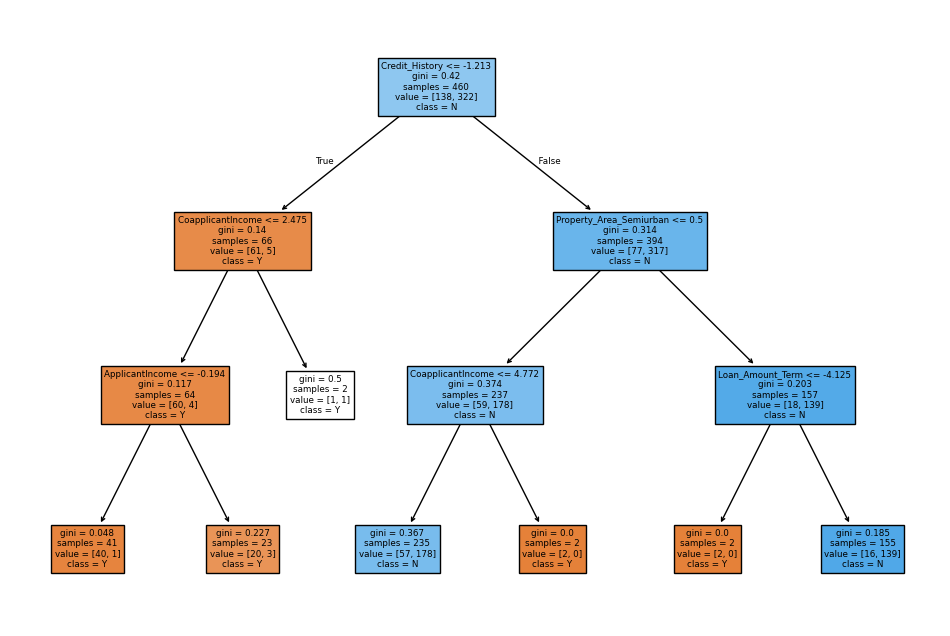

In [ ]:
plt.figure(figsize=(12,8))

tree.plot_tree(tuned_tree, feature_names=x_names, class_names=y_un, filled=True)
plt.show()

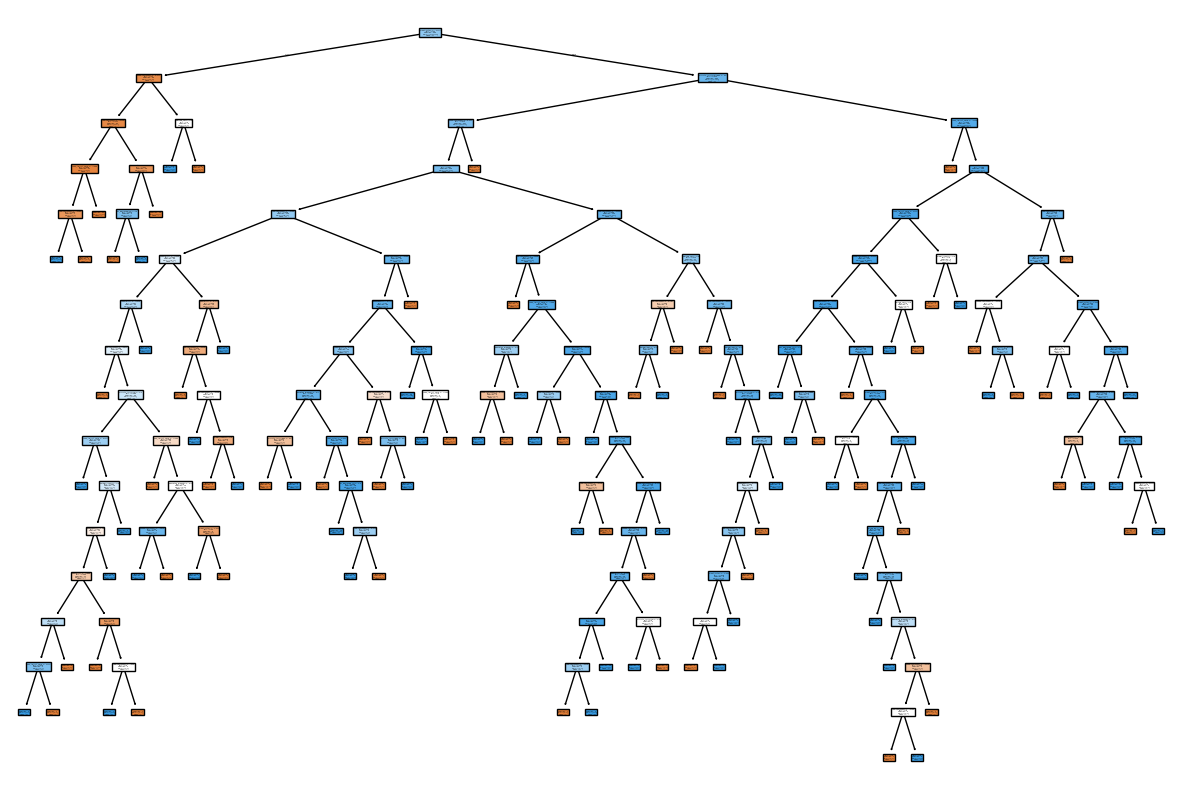

In [ ]:
plt.figure(figsize=(15,10))

tree.plot_tree(default_tree, feature_names=x_names, class_names=y_un, filled=True)
plt.show()

Evaluation of both models the tuned and defauit

In [ ]:
#Evaluating the default_tree model with the actual values(y_test) and pred_values

print(classification_report(y_test, default_tree_pred))

              precision    recall  f1-score   support

           N       0.48      0.43      0.45        54
           Y       0.71      0.75      0.73       100

    accuracy                           0.64       154
   macro avg       0.59      0.59      0.59       154
weighted avg       0.63      0.64      0.63       154



In [ ]:
confusion_matrix(y_test, default_tree_pred)

array([[23, 31],
       [25, 75]])

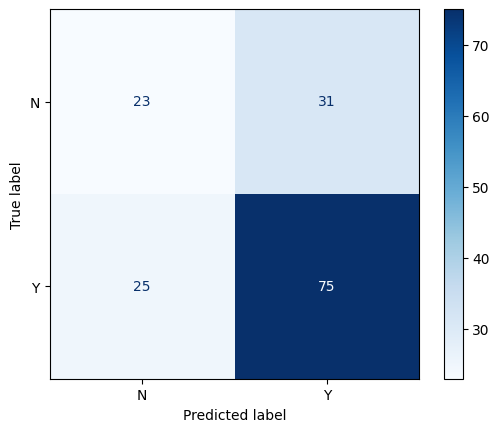

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, default_tree_pred, cmap='Blues')

In [ ]:
#Evaluating the graphic search cv tree with the actual values(y_test) and pred_values

print(classification_report(y_test, gsc_tree_pred))

              precision    recall  f1-score   support

           N       0.92      0.41      0.56        54
           Y       0.75      0.98      0.85       100

    accuracy                           0.78       154
   macro avg       0.84      0.69      0.71       154
weighted avg       0.81      0.78      0.75       154



In [ ]:
confusion_matrix(y_test, gsc_tree_pred)

array([[22, 32],
       [ 2, 98]])

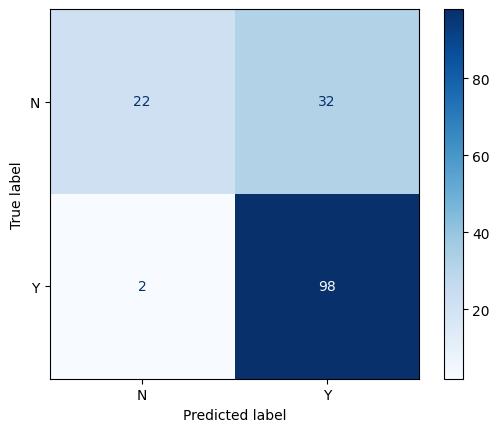

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, gsc_tree_pred, cmap='Blues')

# Support Vector Machine Algorithm Explained

Support Vector Machine (SVM) is a powerful supervised learning algorithm used for classification and regression tasks. Let me explain it from first principles.

## Core Concept

The fundamental idea behind SVM is to find an optimal hyperplane that separates data points of different classes while maximizing the margin between the closest points from each class. These closest points are called "support vectors" because they "support" or define the position of the hyperplane.

## Mathematical Foundation

Consider a binary classification problem with data points $(x_i, y_i)$ where $x_i$ is a feature vector and $y_i \in \{-1, 1\}$ is the class label.

The hyperplane is defined as:
$w \cdot x + b = 0$

Where:
- $w$ is the normal vector to the hyperplane
- $b$ is the bias term

The decision function is:
$f(x) = \text{sign}(w \cdot x + b)$

The margin is the distance between the hyperplane and the closest data points, which we want to maximize. This leads to the optimization problem:

Maximize $\frac{2}{||w||}$ subject to $y_i(w \cdot x_i + b) \geq 1$ for all $i$

This is typically converted to the dual form using Lagrange multipliers, which allows for the "kernel trick" to handle non-linear relationships.

## The Kernel Trick

When data isn't linearly separable, SVM uses kernel functions to implicitly map data into higher-dimensional spaces where linear separation becomes possible. Common kernels include:

- Linear: $K(x_i, x_j) = x_i \cdot x_j$
- Polynomial: $K(x_i, x_j) = (x_i \cdot x_j + c)^d$
- Radial Basis Function (RBF): $K(x_i, x_j) = \exp(-\gamma ||x_i - x_j||^2)$
- Sigmoid: $K(x_i, x_j) = \tanh(\alpha x_i \cdot x_j + c)$

## Soft Margin

In practice, perfect separation may not be possible or might lead to overfitting. "Soft margin" SVM introduces slack variables $\xi_i$ that allow for some misclassification:

Minimize $\frac{1}{2}||w||^2 + C\sum_{i=1}^{n}\xi_i$

Subject to $y_i(w \cdot x_i + b) \geq 1 - \xi_i$ and $\xi_i \geq 0$ for all $i$

Where $C$ is a regularization parameter controlling the trade-off between margin maximization and misclassification.

## Pros of SVM

1. **Effective in high-dimensional spaces** - Works well even when the number of dimensions exceeds the number of samples
2. **Memory efficient** - Only uses a subset of training points (support vectors) in the decision function
3. **Versatile** - Different kernel functions make it adaptable to various data distributions
4. **Robust to overfitting** - Especially in high-dimensional spaces due to the regularization parameter
5. **Solid theoretical foundation** - Based on structural risk minimization principle

## Cons of SVM

1. **Computationally intensive** - Training time can be cubic in the dataset size for large datasets
2. **Parameter tuning** - Selecting appropriate kernel and hyperparameters (C, gamma) can be challenging
3. **Lack of transparency** - Difficult to interpret the model, especially with non-linear kernels
4. **Not directly suitable for multi-class problems** - Requires multiple binary classifiers
5. **Sensitivity to noise** - Performs poorly when classes have significant overlap
6. **Memory intensive for large datasets** - The kernel matrix can grow quadratically

SVMs remain widely used in many domains where their advantages outweigh these limitations, particularly in cases with clear margins, moderate-sized datasets, or high-dimensional feature spaces.

In [ ]:
from sklearn.svm import SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

In [ ]:
# Creating a pipeline
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False , handle_unknown='ignore')),
    ('classifier', SVC())

])


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    verbose_feature_names_out=False)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipelines for numerical and categorical features
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

# Create a pipeline with preprocessing and the SVM model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC()),
])


# Define parameter grid for hyperparameter tuning, including preprocessing steps
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}

# Perform grid search with the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype='object'))])),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': ['scale', 'auto'],
                         'classifier__kernel': ['linear', 'rbf']})

In [ ]:
#traning the

In [ ]:
# Get the best estimator (model with best hyperparameters)
best_svm = grid_search.best_estimator_
best_svm

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype='object'))])),
                ('classifier', SVC(C=0.1, kernel='linear'))])

In [ ]:
# Predict on test set
y_pred = best_svm.predict(X_test)
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [ ]:
# Evaluate model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [ ]:
confusion_matrix(y_test, y_pred)

array([[18, 25],
       [ 1, 79]])

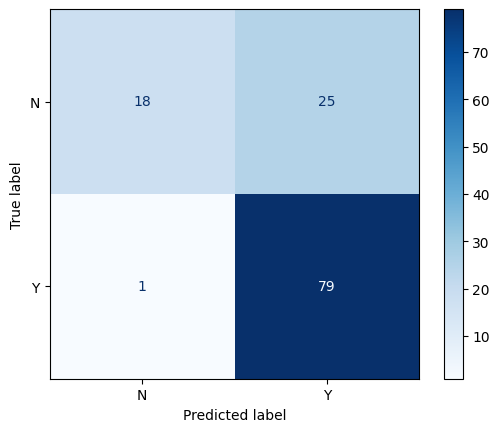

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

No 3

Random Forest Algorithm

# Random Forest Algorithm: A First Principles Explanation

## Core Concept

Random Forest is an ensemble learning technique that combines multiple decision trees to improve prediction accuracy and control overfitting. At its foundation, the algorithm works by:

1. Creating many decision trees using bootstrapped samples of the training data
2. Introducing randomness when building each tree by considering only a subset of features at each split
3. Aggregating predictions from all trees (voting for classification, averaging for regression)

## How It Works From First Principles

### Bootstrap Aggregating (Bagging)

Each tree in the forest is trained on a random sample of the training data, drawn with replacement. This means:
- Some observations may appear multiple times in a sample
- Some observations (~37%) won't appear in a sample (these become "out-of-bag" samples)

This creates diversity among the trees, as each one sees a slightly different version of the data.

### Random Feature Selection

When determining the best split at each node:
- Only a random subset of features is considered (typically √p features for classification or p/3 for regression, where p is the total number of features)
- The best split is chosen from this subset using a criterion like Gini impurity or information gain

This further increases diversity among trees, as each tree considers different feature subsets at each split.

### Prediction Aggregation

- For classification: Each tree "votes" for a class, and the majority vote becomes the forest's prediction
- For regression: The predictions from all trees are averaged to produce the final prediction

## Pros of Random Forest

1. **High Accuracy**: Generally performs better than individual decision trees due to reduced variance through ensemble learning

2. **Robustness to Overfitting**: Random selection of data and features makes it less prone to overfitting compared to single decision trees

3. **Feature Importance**: Provides built-in methods to calculate feature importance, helping with feature selection and model interpretation

4. **Handles Non-Linearity**: Effectively captures non-linear relationships and complex interactions between features

5. **No Feature Scaling Required**: Insensitive to the scale of features, unlike many other algorithms

6. **Handles Missing Values**: Can work with datasets containing missing values without extensive preprocessing

7. **Parallelization**: Trees can be built independently, allowing for efficient parallel processing

## Cons of Random Forest

1. **Black Box Nature**: Despite feature importance metrics, less interpretable than a single decision tree

2. **Computational Cost**: Training many trees requires more computational resources than simpler models

3. **Memory Usage**: Storing many trees requires significant memory, especially for large datasets

4. **Training Time**: Can be slow to train on large datasets with many features

5. **Limited Extrapolation**: Like all tree-based methods, struggles with extrapolation beyond the range of training data

6. **Bias Toward Categorical Features**: Tends to favor features with many categories when determining splits

7. **Hyperparameter Tuning**: Performance depends on careful tuning of hyperparameters (number of trees, maximum depth, etc.)

Random Forest strikes a balance between the simplicity of decision trees and the power of ensemble methods, making it a versatile algorithm widely used across various domains where prediction accuracy is a priority.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Importing OneHotEncoder
from sklearn.compose import ColumnTransformer # Importing ColumnTransformer


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
numeric_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create separate pipelines for numerical and categorical features
numeric_pipeline = Pipeline([
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')), # Applying OneHotEncoder to categorical features
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features),
    ])

# Create a model pipeline with the preprocessor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred = pipeline.predict(X_test)
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [ ]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           N       0.86      0.42      0.56        43
           Y       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



In [ ]:
confusion_matrix(y_test, y_pred)

array([[18, 25],
       [ 3, 77]])

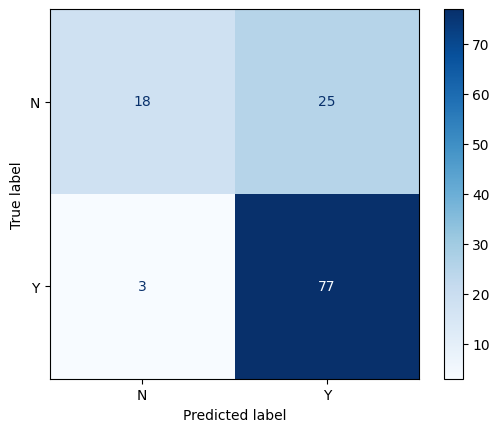

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

  No 4
  
  Logi


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score
from sklearn.datasets import fetch_openml


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score
from sklearn.datasets import fetch_openml

# Load dataset: Wine Quality Dataset
print("Loading dataset...")
wine = fetch_openml(name="wine-quality", version=1, as_frame=True)
X = wine.data
y = wine.target

# Convert target to binary classification for demonstration purposes
# Let's define quality >= 6 as "good" wine (1) and quality < 6 as "not good" wine (0)
y = (y.astype(int) >= 6).astype(int)

print(f"Dataset shape: {X.shape}")
print(f"Target distribution: {pd.Series(y).value_counts()}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# PART B - 1: Create and evaluate a default logistic regression model
print("\n--- Default Logistic Regression Model ---")

# Create pipeline with scaling
pipe_default = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

# Train default model
pipe_default.fit(X_train, y_train)

# Predictions
y_pred_default = pipe_default.predict(X_test)

# Evaluate default model
print("\nDefault Model Classification Report:")
print(classification_report(y_test, y_pred_default))

# Confusion Matrix for default model
cm_default = confusion_matrix(y_test, y_pred_default)
print("\nDefault Model Confusion Matrix:")
print(cm_default)

# Calculate recall_macro for default model
recall_macro_default = recall_score(y_test, y_pred_default, average='macro')
print(f"\nDefault Model Recall Macro: {recall_macro_default:.4f}")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm_default, display_labels=["Not Good", "Good"]).plot(cmap='Blues')
plt.title('Confusion Matrix - Default Logistic Regression')
plt.tight_layout()
plt.show()

# PART B - 2: Use GridSearchCV to tune the model
print("\n--- Grid Search for Hyperparameter Tuning ---")

# Create pipeline for grid search
pipe_grid = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Define parameter grid
param_grid = {
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'classifier__penalty': ['l1', 'l2', 'elasticnet', None],
    'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'classifier__class_weight': [None, 'balanced'],
    'classifier__l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0]  # Only used with elasticnet
}

# Note: Not all solvers support all penalties, so we'll handle this in the grid search
grid_search = GridSearchCV(
    pipe_grid,
    param_grid=param_grid,
    cv=3,  # Using 3 folds as suggested
    scoring='recall_macro',
    verbose=1,
    n_jobs=-1,
    error_score='raise'
)

# Some solver-penalty combinations are invalid, so we'll catch these errors
try:
    grid_search.fit(X_train, y_train)
except Exception as e:
    print(f"Error during GridSearchCV: {e}")

    # Modified parameter grid to handle incompatible combinations
    valid_param_grid = [
        # liblinear supports l1, l2
        {'classifier__solver': ['liblinear'],
         'classifier__penalty': ['l1', 'l2'],
         'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
         'classifier__class_weight': [None, 'balanced']},

        # saga supports l1, l2, elasticnet, none
        {'classifier__solver': ['saga'],
         'classifier__penalty': ['l1', 'l2', 'elasticnet', None],
         'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
         'classifier__class_weight': [None, 'balanced'],
         'classifier__l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0]},

        # newton-cg, lbfgs, sag support l2, none
        {'classifier__solver': ['newton-cg', 'lbfgs', 'sag'],
         'classifier__penalty': ['l2', None],
         'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
         'classifier__class_weight': [None, 'balanced']}
    ]

    # Run with valid combinations
    grid_search = GridSearchCV(
        pipe_grid,
        param_grid=valid_param_grid,
        cv=3,
        scoring='recall_macro',
        verbose=1,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

# Display best parameters
print("\nBest parameters found:")
print(grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# PART B - 3: Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

print("\nTuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned))

# Confusion Matrix for tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
print("\nTuned Model Confusion Matrix:")
print(cm_tuned)

# Calculate recall_macro for tuned model
recall_macro_tuned = recall_score(y_test, y_pred_tuned, average='macro')
print(f"\nTuned Model Recall Macro: {recall_macro_tuned:.4f}")

# Visualize confusion matrix for tuned model
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=["Not Good", "Good"]).plot(cmap='Blues')
plt.title('Confusion Matrix - Tuned Logistic Regression')
plt.tight_layout()
plt.show()

# Compare default and tuned models
print("\n--- Model Comparison ---")
print(f"Default Model Recall Macro: {recall_macro_default:.4f}")
print(f"Tuned Model Recall Macro: {recall_macro_tuned:.4f}")
print(f"Improvement: {(recall_macro_tuned - recall_macro_default) * 100:.2f}%")

# Feature importance analysis (coefficients of the tuned model)
if hasattr(best_model.named_steps['classifier'], 'coef_'):
    feature_importance = best_model.named_steps['classifier'].coef_[0]
    feature_names = X.columns

    # Create a DataFrame for visualization
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': np.abs(feature_importance)
    })
    importance_df = importance_df.sort_values('Importance', ascending=False)

    # Visualize top 10 features
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
    plt.title('Top 10 Features by Importance')
    plt.tight_layout()
    plt.show()

    # Print top and bottom features
    print("\nTop 5 Most Important Features:")
    for i, row in importance_df.head(5).iterrows():
        coef = feature_importance[np.where(feature_names == row['Feature'])[0][0]]
        direction = "positive" if coef > 0 else "negative"
        print(f"{row['Feature']}: {np.abs(coef):.4f} ({direction} impact)")

    print("\nBottom 5 Least Important Features:")
    for i, row in importance_df.tail(5).iterrows():
        coef = feature_importance[np.where(feature_names == row['Feature'])[0][0]]
        direction = "positive" if coef > 0 else "negative"
        print(f"{row['Feature']}: {np.abs(coef):.4f} ({direction} impact)")

# Data insights
print("\n--- Data Insights ---")
# Convert X to DataFrame if it's not already
X_df = X if isinstance(X, pd.DataFrame) else pd.DataFrame(X)
X_df['quality'] = y
print(f"Dataset shape: {X_df.shape}")

# Correlation with target
corr_with_target = X_df.corr()['quality'].sort_values(ascending=False)
print("\nTop correlations with wine quality:")
print(corr_with_target)

# Distribution of features based on quality
good_wine = X_df[X_df['quality'] == 1]
not_good_wine = X_df[X_df['quality'] == 0]

# Visualize distributions of top features
top_features = corr_with_target.index[1:4]  # Exclude quality itself

plt.figure(figsize=(15, 5))
for i, feature in enumerate(top_features):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(not_good_wine[feature], label='Not Good Wine', fill=True)
    sns.kdeplot(good_wine[feature], label='Good Wine', fill=True)
    plt.title(f'Distribution of {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

Task 5 - Unsupervised learning


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Load the modified galton height data
fpath = "/content/cust_seg[Task 5] - cust_seg.csv"
df = pd.read_csv(fpath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [ ]:
df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

In [ ]:
df.set_index('Customer Id', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 850 entries, 1 to 850
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 59.8 KB


In [ ]:
df.describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [ ]:
features = ['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'DebtIncomeRatio']

#Imputing and scaling
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
df_imputed = imputer.fit_transform(df[features])
df_tr = scaler.fit_transform(df_imputed)

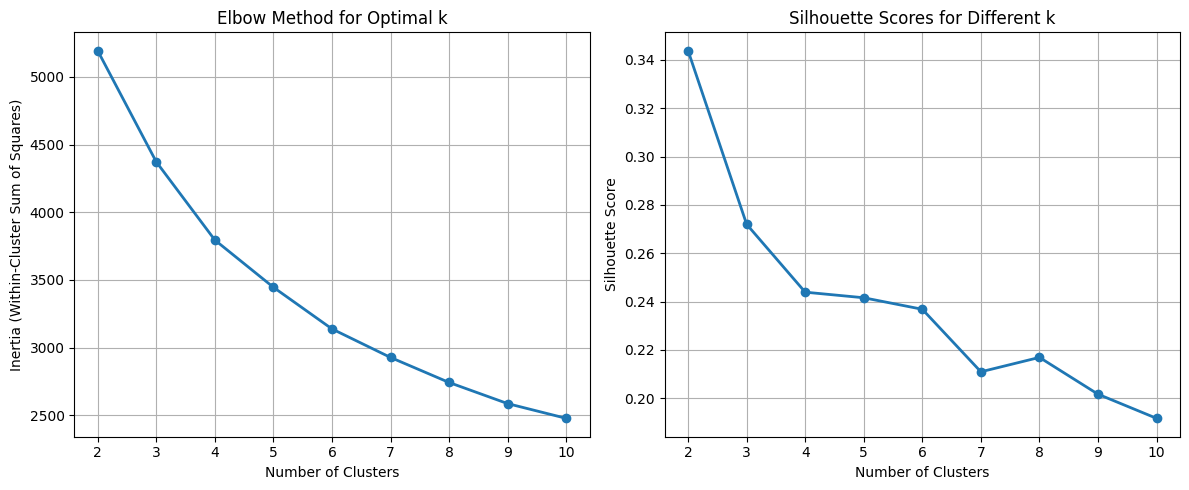

In [ ]:
# Find optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_tr)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_tr, kmeans.labels_))


# Plot the Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-', linewidth=2)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'o-', linewidth=2)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.grid(True)

plt.tight_layout()
plt.show()




In [ ]:
# Apply K-means with optimal k
kmeans = KMeans(n_clusters= 3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_tr)

# Display cluster distribution
print(df['Cluster'].value_counts())


Cluster
0    527
1    181
2    142
Name: count, dtype: int64


In [ ]:
# Calculate cluster centers and convert back to original scale
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_),
                              columns=features)

# Calculate cluster profiles
cluster_profiles = df.groupby('Cluster')[features].mean().round(2)
print("\nCluster profiles (mean values):")
print(cluster_profiles)



Cluster profiles (mean values):
           Age   Edu  Years Employed  Income  Card Debt  Other Debt  \
Cluster                                                               
0        33.98  1.58            7.76   36.27       0.83        1.78   
1        31.49  1.94            3.90   32.41       1.71        2.95   
2        43.45  1.90           17.53  103.48       4.17        8.06   

         Defaulted  DebtIncomeRatio  
Cluster                              
0             0.00             7.76  
1             0.97            14.39  
2             0.17            13.75  


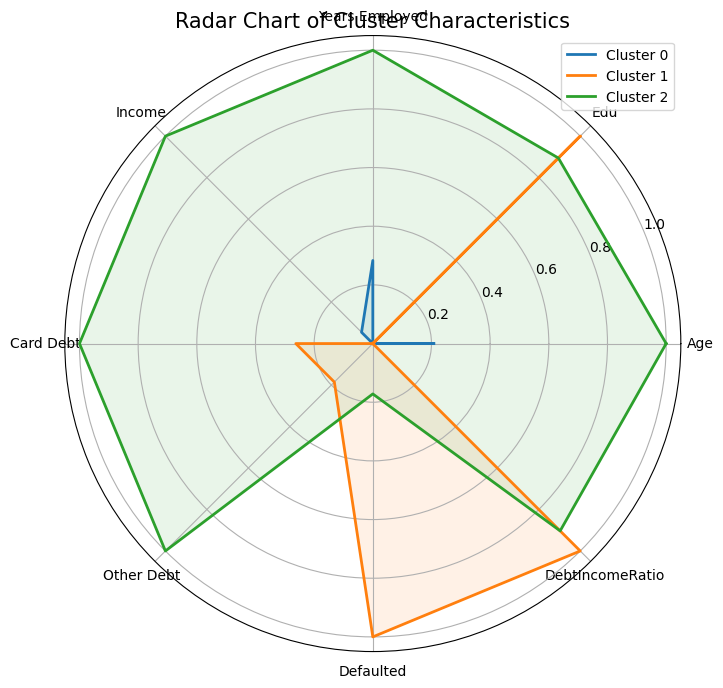

In [ ]:
# Create radar chart function with proper feature labeling
def create_radar_chart(df, cluster_col, features):
    # Calculate the means for each cluster
    cluster_means = df.groupby(cluster_col)[features].mean()

    # Create a figure for the radar chart
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, polar=True)

    # Number of variables
    N = len(features)

    # Angle for each variable
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop

    # Normalize the values for radar chart
    min_max_scaler = lambda x: (x - x.min()) / (x.max() - x.min())
    cluster_means_scaled = cluster_means.apply(min_max_scaler)

    # Plot each cluster
    for i, cluster in enumerate(cluster_means_scaled.index):
        values = cluster_means_scaled.loc[cluster].values.flatten().tolist()
        values += values[:1]  # Close the loop

        ax.plot(angles, values, linewidth=2, linestyle='solid',
                label=f'Cluster {cluster}')
        ax.fill(angles, values, alpha=0.1)

    # Fix: Add feature labels with correct positioning
    plt.xticks(angles[:-1], features, size=10)

    # Add legend
    plt.legend(loc='upper right')
    plt.title('Radar Chart of Cluster Characteristics', size=15)

    return fig

# Define radar features (these are the ones that should appear on your chart)
radar_features = ['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'DebtIncomeRatio']

# Create radar chart
radar_chart = create_radar_chart(df, 'Cluster', radar_features)
plt.show()

In [ ]:
# KMeans Cluster Interpretation
# -----------------------------
print("\n--- KMeans Cluster Interpretation & Recommendations ---")

print("\nCluster 0:")
print("- Younger to middle-aged professionals, moderate income, low default risk.")
print("- Likely stable employees, not overspending.")
print("- ✅ Recommend mid-tier rewards cards or balance transfer offers.")

print("\nCluster 1:")
print("- Lower income, high card and other debt, almost all defaulted.")
print("- Possibly financially vulnerable or mismanaging credit.")
print("- ❗ Recommend secured cards, debt education, or risk-averse lending.")

print("\nCluster 2:")
print("- High income and employment years, higher debt load but low default rate.")
print("- Likely established individuals who manage large expenses well.")
print("- 💳 Recommend premium travel or luxury credit cards with high limits.")



--- KMeans Cluster Interpretation & Recommendations ---

Cluster 0:
- Younger to middle-aged professionals, moderate income, low default risk.
- Likely stable employees, not overspending.
- ✅ Recommend mid-tier rewards cards or balance transfer offers.

Cluster 1:
- Lower income, high card and other debt, almost all defaulted.
- Possibly financially vulnerable or mismanaging credit.
- ❗ Recommend secured cards, debt education, or risk-averse lending.

Cluster 2:
- High income and employment years, higher debt load but low default rate.
- Likely established individuals who manage large expenses well.
- 💳 Recommend premium travel or luxury credit cards with high limits.


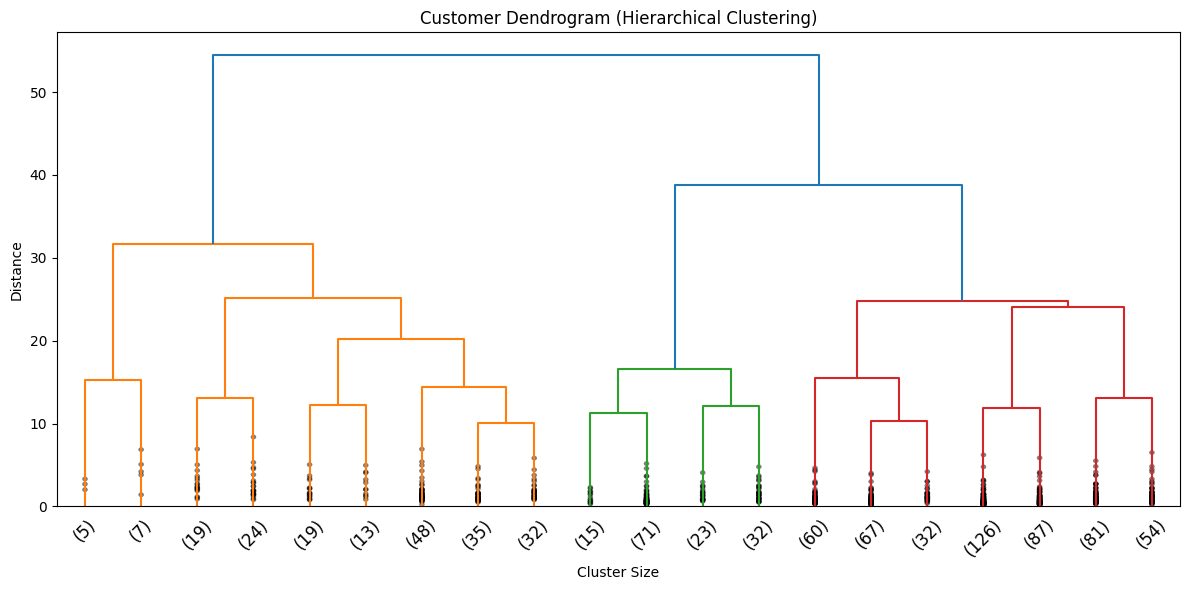

In [ ]:
!pip install scipy
# Apply Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram #importing linkage and dendrogram from scipy

linked = linkage(df_tr, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=20, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title('Customer Dendrogram (Hierarchical Clustering)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

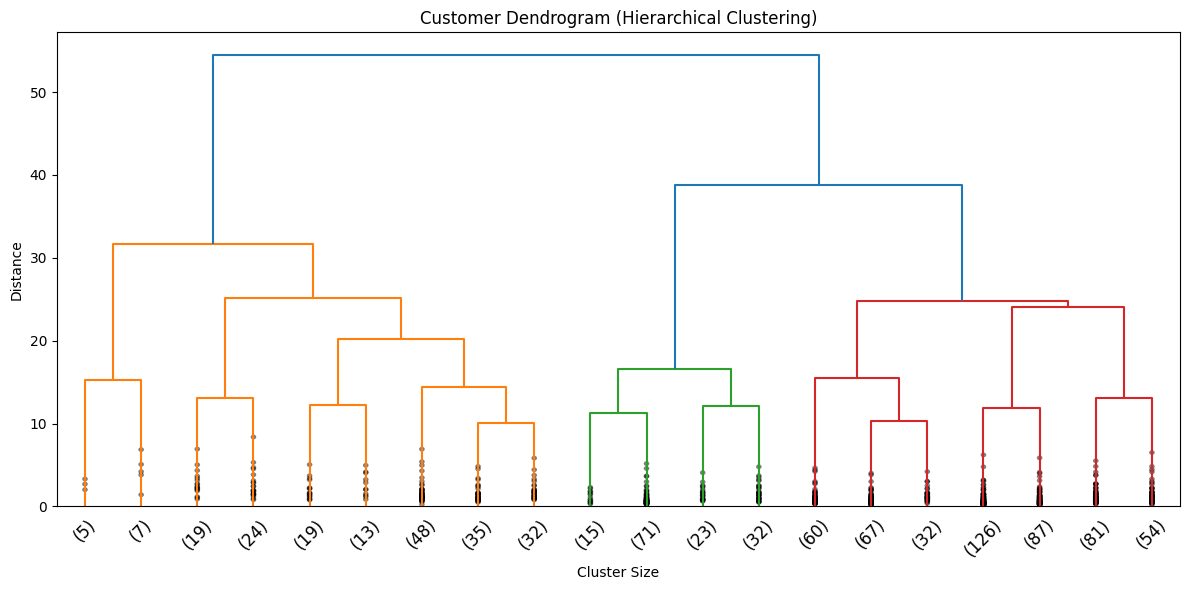

In [ ]:
# Apply Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster #importing linkage, dendrogram and fcluster from scipy

linked = linkage(df_tr, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=20, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title('Customer Dendrogram (Hierarchical Clustering)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [ ]:
#Hierarchical Cluster Summary
print("\n--- Hierarchical Clustering Overview ---")
print("These clusters generally align with KMeans groupings, confirming patterns:")
print("- One high-income group with controlled risk.")
print("- One at-risk group with defaults and low income.")
print("- Others in middle, needing customized offers based on debt ratios and income.")

print("\n✅ This supports targeted marketing based on behavior and risk profile.")



--- Hierarchical Clustering Overview ---
These clusters generally align with KMeans groupings, confirming patterns:
- One high-income group with controlled risk.
- One at-risk group with defaults and low income.
- Others in middle, needing customized offers based on debt ratios and income.

✅ This supports targeted marketing based on behavior and risk profile.


 Final Insights:

 Cluster 0: Stable mid-earners with low default. Recommend mid-tier rewards cards.

 Cluster 1: High defaulters, lower income. Offer secured credit cards and financial education.

Cluster 2: High earners, high spenders. Promote premium or luxury cards.

Hierarchical clusters reflect similar patterns and support KMeans strategy. This analysis helps stakeholders (credit card company) better tailor product offerings by segment.


In [ ]:
# Export the full dataset with cluster labels
df.to_csv("clustered_customers.csv")
print("✅ Clustered customer data saved to 'clustered_customers.csv'")


✅ Clustered customer data saved to 'clustered_customers.csv'
